In [ ]:
!pip install ktrain

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
df_train=pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx',dtype=str)
df_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [ ]:
df_test=pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx',dtype=str)
df_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [ ]:
(X_train, y_train),(X_test, y_test),preprocess=text.texts_from_df(train_df=df_train,
                                                                  text_column='Reviews',
                                                                  label_columns='Sentiment',
                                                                  val_df=df_test,
                                                                  maxlen=400,
                                                                  preprocess_mode='bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(25000, 400)

In [ ]:
model=text.text_classifier(name='bert',train_data=(X_train, y_train),
                           preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
#Get learning rate
learner=ktrain.get_learner(model=model,
                           train_data=(X_train,y_train),
                           val_data=(X_test,y_test),
                           batch_size=6)

simulating training for different learning rates... this may take a few moments...
4167/4167 [==============================] - 3468s 832ms/step - loss: 7.9540 - accuracy: 0.6018


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


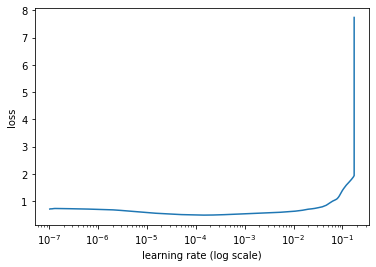

In [ ]:
#Gives the optimal learning rate, may take days to run
#learner.lr_find(max_epochs=1)
#learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr=2e-5,epochs=1)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 4288s 1s/step - loss: 0.2618 - accuracy: 0.8905 - val_loss: 0.1115 - val_accuracy: 0.9649


In [ ]:
predictor=ktrain.get_predictor(learner.model,preprocess)

In [ ]:
data=['bogus movie','liked it','waste of time']

In [ ]:
predictor.predict(data)

['neg', 'pos', 'neg']